In [13]:
import pandas as pd

In [14]:
df = pd.read_json("house.json")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14107 entries, 0 to 14106
Data columns (total 6 columns):
bednumber    14107 non-null object
building     14107 non-null object
city         14107 non-null object
soldDate     14107 non-null object
soldPrice    14107 non-null object
soldType     14107 non-null object
dtypes: object(6)
memory usage: 661.3+ KB


### Clean the Data

In [16]:
# Extract postcode
df["postcode"] = df.loc[:, "building"].str.extract("(\w\w\w{1,2} \d\w\w$)")

In [17]:
# Process propertyType, duration, and isNew
t_d_r = df.soldType.str.split(",", expand=True)

t_d_r.columns = ["propertyType", "duration", "residential"]

t_d_r["isNew"] = t_d_r["residential"].str.extract("(New Build)")

t_d_r.loc[t_d_r["isNew"].notnull(), "isNew"] = 1
t_d_r.loc[t_d_r["isNew"].isnull(), "isNew"] = 0

t_d_r.loc[t_d_r["duration"] == " Freehold", "duration"] = 1
t_d_r.loc[t_d_r["duration"] == " Leasehold", "duration"] = 0
t_d_r["duration_free_not_lease"] = t_d_r["duration"]
t_d_r.drop(columns="duration", inplace=True)

df = pd.concat([df, t_d_r], axis=1, sort=False)
df.drop(columns=["residential", "soldType"], inplace=True)

In [18]:
# process soldPrice
df["soldPrice"] = df["soldPrice"].str.extract("([\d+,]+\d+)")

df["soldPrice"] = df["soldPrice"].str.split(",").str.join("")

df["soldPrice"] = df["soldPrice"].astype(int)

In [19]:
# process soldDate, soldYear
df["soldDate"] = pd.to_datetime(df.soldDate)

df["soldyear"] = df["soldDate"].dt.year

print(df["soldyear"].value_counts())

df = df[df["soldyear"] >= 2011]

2018    5362
2017    2751
2016    1761
2019    1547
2015    1038
2014     681
2013     311
2012     153
2010     152
2011     129
2009     106
2007      60
2008      41
2006      15
Name: soldyear, dtype: int64


In [20]:
# process bednumber
df["bednumber"] = df["bednumber"].str.extract("(\d+)").astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13733 entries, 0 to 14106
Data columns (total 10 columns):
bednumber                  13733 non-null int32
building                   13733 non-null object
city                       13733 non-null object
soldDate                   13733 non-null datetime64[ns]
soldPrice                  13733 non-null int32
postcode                   13733 non-null object
propertyType               13733 non-null object
isNew                      13733 non-null object
duration_free_not_lease    13733 non-null object
soldyear                   13733 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 1.0+ MB


### EDA

In [22]:
df[df["isNew"] == 1]

,bednumber,building,city,soldDate,soldPrice,postcode,propertyType,isNew,duration_free_not_lease,soldyear
405,4,"31, Beckford Drive, Lansdown, Bath, Bath And N...",Bath,2018-10-26,537000,BA1 9AU,Detached,1,1,2018
1270,2,"29, Hamilton Drive, Bridgwater, Somerset TA6 4WN",Bridgwater,2018-02-26,142000,TA6 4WN,Terraced,1,1,2018
2533,5,"10, Heron Close, Chard, Somerset TA20 1FW",Chard,2017-05-09,340000,TA20 1FW,Detached,1,1,2017
2974,2,"2, Wheddon Court, Chard, Somerset TA20 2FH",Chard,2014-12-19,133000,TA20 2FH,Terraced,1,1,2014
3046,3,"16, Littlewood Way, Cheddar, Somerset BS27 3FP",Cheddar,2018-03-29,269950,BS27 3FP,Semi-Detached,1,1,2018
3135,2,"5, Purdie Close, Cheddar, Somerset BS27 3NU",Cheddar,2017-03-17,195000,BS27 3NU,Terraced,1,1,2017
3138,1,"8, Cheddar Fields, Cheddar, Somerset BS27 3EF",Cheddar,2017-02-27,105000,BS27 3EF,Flat,1,0,2017
3242,1,"Apartment 3, Acacia Court, Tweentown, Cheddar,...",Cheddar,2015-12-17,194750,BS27 3HY,Flat,1,0,2015
3268,1,"Apartment 11, Acacia Court, Tweentown, Cheddar...",Cheddar,2015-10-01,175000,BS27 3HY,Flat,1,0,2015
3290,3,"2, Purdie Close, Cheddar, Somerset BS27 3NU",Cheddar,2015-08-07,215500,BS27 3NU,Semi-Detached,1,1,2015


In [23]:
len(df["postcode"].unique())

5637

In [24]:
groupbyobj = df.groupby(["postcode", "bednumber", "propertyType", "duration_free_not_lease", "isNew"])

diff = groupbyobj["soldPrice"].max() - groupbyobj["soldPrice"].min()

diff = diff[diff > 0]

diff = diff.reset_index()

diff = diff.sort_values("soldPrice", ascending=False)

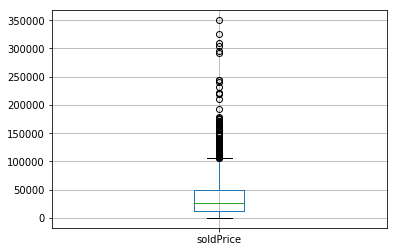

In [27]:
diff.boxplot(column="soldPrice")

In [28]:
sum(diff["soldPrice"] > 50000)

558

In [29]:
diff_outlier = diff[diff["soldPrice"] > 50000]

df_outliers = pd.DataFrame(columns=df.columns)

for i, row in diff_outlier.iterrows():
    df_outliers = df_outliers.append(df[(df["postcode"] == row["postcode"]) & 
                             (df["propertyType"] == row["propertyType"]) & 
                             (df["bednumber"] == row["bednumber"]) &
                             (df["duration_free_not_lease"] == row["duration_free_not_lease"]) &
                             (df["isNew"] == row["isNew"])])

In [30]:
df_outliers

,bednumber,building,city,soldDate,soldPrice,postcode,propertyType,isNew,duration_free_not_lease,soldyear
7337,5,"The Pavilion, Lower Marsh, Dunster, Minehead, ...",Minehead,2018-11-07,375000,TA24 6PJ,Detached,0,1,2018
7868,5,"The Old Manor, Lower Marsh, Dunster, Minehead,...",Minehead,2016-03-31,725000,TA24 6PJ,Detached,0,1,2016
11475,4,"6, North Road, Wells, Somerset BA5 2TJ",Wells,2018-11-26,660000,BA5 2TJ,Detached,0,1,2018
11476,4,"2a, North Road, Wells, Somerset BA5 2TJ",Wells,2018-11-26,740000,BA5 2TJ,Detached,0,1,2018
11851,4,"11, North Road, Wells, Somerset BA5 2TJ",Wells,2016-11-18,455000,BA5 2TJ,Detached,0,1,2016
11919,4,"14, North Road, Wells, Somerset BA5 2TJ",Wells,2016-07-19,780000,BA5 2TJ,Detached,0,1,2016
6094,4,"Beehive Cottage, 37, Old Wells Road, Glastonbu...",Glastonbury,2016-12-14,575500,BA6 8ED,Detached,0,1,2016
6097,4,"20a, Old Wells Road, Glastonbury, Somerset BA6...",Glastonbury,2016-12-05,265000,BA6 8ED,Detached,0,1,2016
1460,4,"57, Conway Crescent, Burnham-on-sea, Somerset ...",Burnham-On-Sea,2018-09-28,370000,TA8 2UW,Detached,0,1,2018
1724,4,"39a, Conway Crescent, Burnham-on-sea, Somerset...",Burnham-On-Sea,2017-11-24,675000,TA8 2UW,Detached,0,1,2017


In [31]:
len(df)

13733

In [32]:
len(df_outliers)

1922

In [33]:
df.drop(index=df_outliers.index, inplace=True)

In [34]:
len(df)

11811

In [35]:
postcode_lat_long = pd.read_csv("ukpostcodes.csv")

In [36]:
postcode_lat_long.drop(columns='id', inplace=True)

In [37]:
df = pd.merge(df, postcode_lat_long, how='left', left_on="postcode", right_on="postcode")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11811 entries, 0 to 11810
Data columns (total 12 columns):
bednumber                  11811 non-null int32
building                   11811 non-null object
city                       11811 non-null object
soldDate                   11811 non-null datetime64[ns]
soldPrice                  11811 non-null int32
postcode                   11811 non-null object
propertyType               11811 non-null object
isNew                      11811 non-null object
duration_free_not_lease    11811 non-null object
soldyear                   11811 non-null int64
latitude                   11811 non-null float64
longitude                  11811 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 1.1+ MB


In [39]:
data = df.loc[:, ["soldPrice", "bednumber", "propertyType", "duration_free_not_lease", "isNew", "latitude", "longitude"]]

In [40]:
data.to_csv("data.csv")

In [41]:
data

,soldPrice,bednumber,propertyType,duration_free_not_lease,isNew,latitude,longitude
0,487000,4,Semi-Detached,1,0,51.389446,-2.401029
1,483000,4,Semi-Detached,1,0,51.398812,-2.345813
2,285000,2,Semi-Detached,1,0,51.373936,-2.390162
3,250000,2,Semi-Detached,1,0,51.379450,-2.397522
4,267000,3,Terraced,1,0,51.358799,-2.383168
5,252000,3,Semi-Detached,1,0,51.396581,-2.394206
6,170000,2,Terraced,1,0,51.358799,-2.383168
7,340000,3,Terraced,0,0,51.393020,-2.346114
8,301000,2,Terraced,1,0,51.397892,-2.394793
9,290000,2,Terraced,1,0,51.380642,-2.385304
